# MA336_Final Project_2320798 

# Water Quality Clasification

## Introduction

A fundamental human right, access to clean drinking water is essential to the success of national, regional, and local health protection initiatives. This is a subject of utmost importance since it affects development and health in profound ways. As evidenced by studies, the economy can benefit from spending on sanitation and water delivery. These investments have the potential to produce a net economic benefit that outweighs the implementation costs by lowering the cost of healthcare and negative health impacts.

This problem is significant in many ways. In addition to being necessary for preserving health  having access to clean drinking water also affects other facets of life such as productivity, education, and general well-being. Additionally, the absence of Lack of access to clean drinking water can have serious repercussions, such as an increase in death rates and the spread of diseases transmitted by water.

By doing this, we may advance economic expansion, development, and health, ultimately raising people's standard of living both individually and as a global community.

### Dataset Information

* Source :https://www.kaggle.com/datasets/adityakadiwal/water-potability/data

1. pH value:

pH is a vital indicator for assessing the acid-base balance of a substance, helping to detect whether water is acidic or alkaline. The pH range for drinking water, according to the World Health Organisation (WHO), is 6.5 to 8.5. The pH range of 6.52 to 6.83 in this study is within the range that the World Health Organisation advises.

2. Hardness:

Salts of calcium and magnesium are the main causes of hardness. Water passes through geologic strata that contain these salts, which dissolve them. The amount of hardness in raw water is influenced by the amount of time it spends in contact with materials that produce hardness. The ability of water to precipitate soap due to the presence of calcium and magnesium was the original definition of hardness.

3. Solids (Total dissolved solids - TDS):

Many inorganic and some organic minerals and salts, including potassium, calcium, sodium, bicarbonates, chlorides, magnesium, and sulphates, can be dissolved in water. These minerals gave the water an unpleasant flavour and a diluted colour. This is a crucial factor in how water is used. High TDS values are indicative of highly mineralized water. TDS is recommended to be consumed at a maximum of 1000 mg/l and at a desirable limit of 500 mg/l.

4. Chloramines:

The two main disinfectants utilised in public water systems are chlorine and chloramine. Most frequently, ammonia is added to chlorine to treat drinking water, which results in the formation of chloramines. It is deemed safe for drinking water to have up to 4 mg/L, or 4 parts per million (ppm), of chlorine.

5. Sulfate:

Sulphates are organic compounds that are present in rocks, soil, and minerals. They can be found in food, plants, groundwater, and ambient air. Sulphate is mostly used in the chemical industry for commercial purposes. The amount of sulphur present in saltwater is around 2,700 mg/L. In most freshwater sources, its concentrations vary from 3 to 30 mg/L, yet in certain regions, significantly greater quantities (1000 mg/L) are observed.

6. Conductivity:

Pure water is a good insulator and not a strong conductor of electrical current. Water's electrical conductivity is improved when the concentration of ions rises. Electrical conductivity in water is often determined by the concentration of dissolved particles in the water. In actuality, electrical conductivity (EC) gauges a solution's ability to transfer electricity through its ionic process. The WHO recommends that the EC value not be more than 400 μS/cm.

7. Organic_carbon:

Both synthetic and naturally occurring organic matter (NOM) that has decomposed is the source of total organic carbon (TOC) in source waters. The total organic carbon content, or TOC, of pure water is measured. The US EPA states that the TOC in treated or drinking water is less than 2 mg/L, and in source water used for treatment, it is less than 4 mg/Lit.

8. Trihalomethanes:

THMs are substances that can be present in chlorine-treated water. The amount of organic matter in the water, the temperature of the treated water, and the amount of chlorine needed to treat the water all affect the concentration of THMs in drinking water. THM concentrations in drinking water up to 80 ppm are regarded as safe.

9. Turbidity:

The amount of solid materials in the suspended state determines how turbid the water is. The test is used to determine the quality of waste discharge in relation to colloidal matter. It measures the light-emitting capabilities of water. Wondo Genet Campus's mean turbidity value of 0.98 NTU is less than the 5.00 NTU WHO-recommended threshold.

10. Potability:

Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

Input Variables:

| Parameter            | Description                                                                                   |
|----------------------|-----------------------------------------------------------------------------------------------|
| pH                   | pH of water                                                                                   |
| Hardness             | Capacity of water to precipitate soap in mg/L                                                 |
| Solids               | Total dissolved solids in ppm                                                                 |
| Chloramines          | Amount of Chloramines in ppm                                                                  |
| Sulfate              | Amount of Sulfates dissolved in mg/L                                                          |
| Conductivity         | Electrical conductivity of water in μS/cm                                                     |
| Organic_carbon       | Amount of organic carbon in ppm                                                               |
| Trihalomethanes      | Amount of Trihalomethanes in μg/L                                                             |
| Turbidity            | Measure of light emitting property of water in NTU (Nephelometric Turbidity Units)            |


Output Variable

| Parameter| Description| 
|----------|----------|
| Potability   | Indicates if water is safe for human consumption  |



# Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tqdm import tqdm_notebook
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics 

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))



# Load Dataset

In [2]:
Wdata=pd.read_csv('/Users/harishsharma/Desktop/Machine learning and AI/Water.csv')
Wdata.head(10)

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0        NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1   3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2   8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   
8        NaN  118.988579  14285.583854     7.804174  268.646941    389.375566   
9  11.180284  227.231469  25484.508491     9.077200  404.041635    563.885481   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0  
8       12.706049        53.928846   3.595017           0  
9       17.927806        71.976601   4.370562           0

# Data Description

In [3]:
Wdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


The water quality dataset has 3276 rows and 10 columns, as shown by the output. Further- more, all are continous variables some variable also consist missing values

In [4]:
Wdata.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

In [5]:
print('There are {} data points and {} features in the data'.format(Wdata.shape[0],Wdata.shape[1]))

There are 3276 data points and 10 features in the data


# Dependent Variable Analysis

In [6]:
Dep = pd.DataFrame(Wdata["Potability"].value_counts())
Dep

count
Potability       
0            1998
1            1278

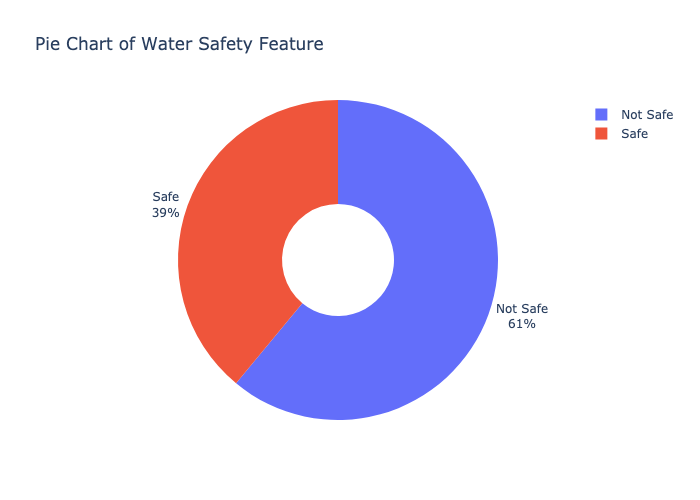

In [7]:
Dep = pd.DataFrame({
    "Safety": ["Not Safe", "Safe"],
    "count": [1998, 1278]  # Example counts, replace with your actual data
})

# Creating the interactive pie chart
fig = px.pie(Dep, values='count', names='Safety', hole=0.35, 
             title='Pie Chart of Water Safety Feature')

# Updating the trace to show the percentage and label outside the chart
fig.update_traces(textposition='outside', textinfo='percent+label')

# Showing the plot
#fig.show()

# Exporting the pie chart as a static image
fig.write_image("pie_chart.png")

# Display the saved image within the notebook
from IPython.display import Image
Image(filename="pie_chart.png")



## Exploratory Data Analysis

It is necessary to carry out exploratory data analysis  prior to developing any machine learning model. With the use of EDA, we may fully comprehend the dataset, identify underlying patterns, and find abnormalities or outliers. Through data visualisation and summarization, we may detect and eliminate superfluous or irrelevant features that might have an adverse effect on the performance of the model. This procedure aids in identifying the most important variables and guarantees that the data is clear and ready for modelling. Furthermore, EDA can highlight correlations between variables and offer insights that inform the selection of algorithms and model parameters, ultimately producing machine learning models that are more accurate and dependable.

## Missing  Values

<Axes: >

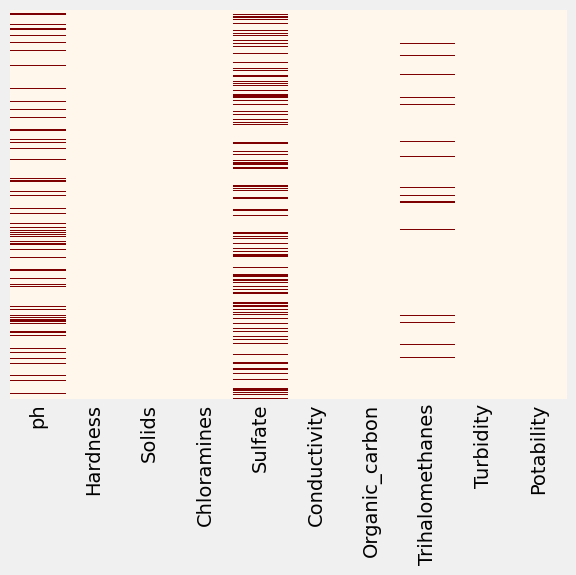

In [8]:
sns.heatmap(Wdata.isnull(),yticklabels=False,cbar=False,cmap='OrRd')

In [9]:
Wdata.isnull().sum()


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

As the graph above shows, several characteristics had null values. Specifically, the ph column has 491 null entries, the sulphate column has 781 null values, and the trihalomethanes column has 162 null values. We must handle these missing data points in order to ensure the accuracy and efficiency of our machine learning model. In the next sections, we will employ several imputation approaches to address these null values. This will require techniques like appending random values to the data or imputation of the mean, median, or mode.

## Handling Missing Values

### PH

In [10]:
Wdata['ph'].describe()

count    2785.000000
mean        7.080795
std         1.594320
min         0.000000
25%         6.093092
50%         7.036752
75%         8.062066
max        14.000000
Name: ph, dtype: float64

Filling the missing values by mean

In [11]:
Wdata['ph_mean']=Wdata['ph'].fillna(Wdata['ph'].mean())

In [12]:
Wdata['ph_mean'].isnull().sum()

0

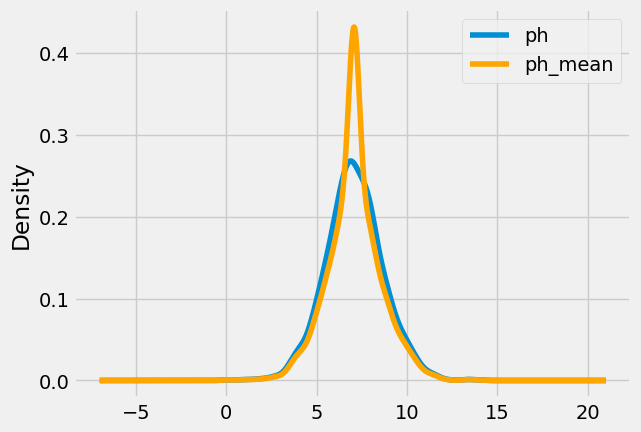

In [13]:

plot = plt.figure()
axis = plot.add_subplot(111)
Wdata['ph'].plot(kind='kde', ax=axis)
Wdata.ph_mean.plot(kind='kde', ax=axis, color='orange')
lines, labels = axis.get_legend_handles_labels()
axis.legend(lines, labels, loc='best')
plt.show()

We attempted to utilise the mean to fill in the missing values for the Ph feature and discovered that, as a result, our data is not uniformlly distributed  Ensuring uniformity in data before feeding it into a machine learning model is crucial for several reasons. Firstly, it improves model accuracy by helping the model learn underlying patterns more effectively. Secondly, it ensures fairness and consistency, preventing any feature from disproportionately influencing the model due to differences in scale. Uniform data also enhances convergence, allowing algorithms to find optimal solutions faster and more reliably. Additionally, it reduces bias by preventing any feature from dominating the learning process. 

Filling the data with random values

In [14]:
def impute_nan(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In the above code we are creating the function to fill values with random sample

In [15]:
impute_nan(Wdata,"ph")

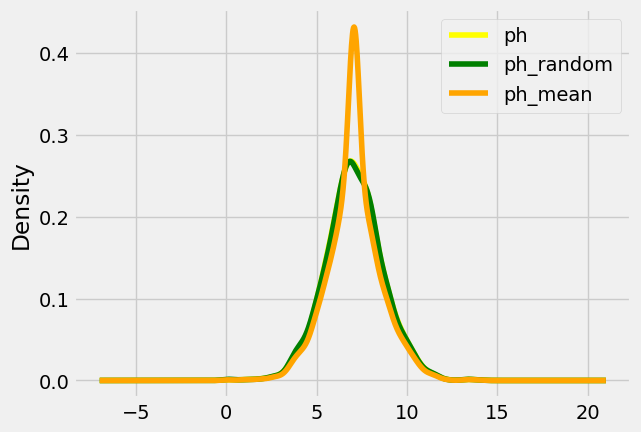

In [16]:
figure = plt.figure()
axis = figure.add_subplot(111)
Wdata['ph'].plot(kind='kde', ax=axis, color='yellow')
Wdata.ph_random.plot(kind='kde', ax=axis, color='green')
Wdata.ph_mean.plot(kind='kde', ax=axis, color='orange')
lines, labels = axis.get_legend_handles_labels()
axis.legend(lines, labels, loc='best')
plt.show()

Uniform distribution with random initialization

In [17]:
impute_nan(Wdata,"Sulfate")

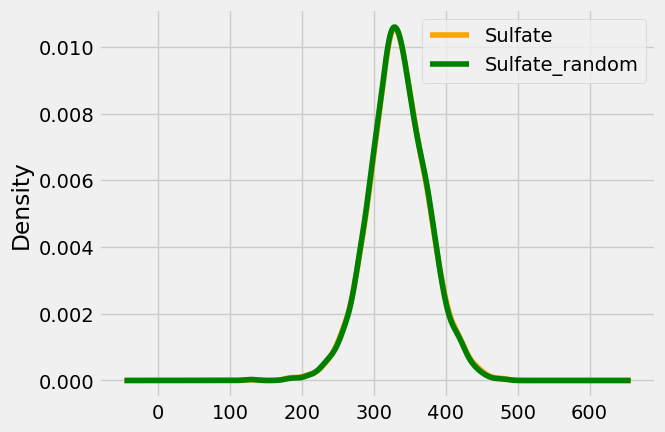

In [18]:
figure = plt.figure()
axes = figure.add_subplot(111)
Wdata['Sulfate'].plot(kind='kde', ax=axes, color='orange')
Wdata["Sulfate_random"].plot(kind='kde', ax=axes, color='green')
lines, labels = axes.get_legend_handles_labels()
axes.legend(lines, labels, loc='best')
plt.show()

In [19]:
impute_nan(Wdata,"Trihalomethanes")

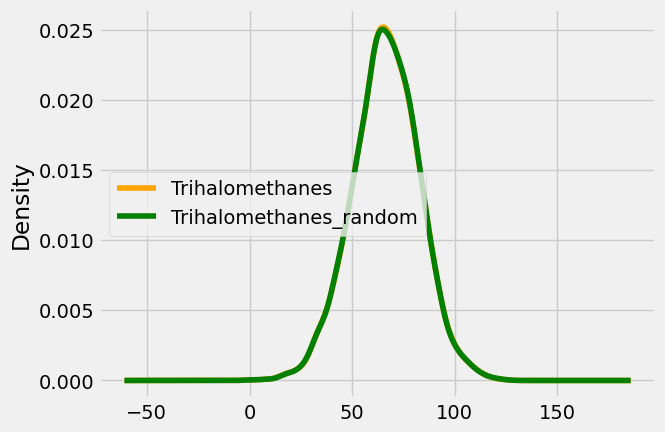

In [20]:
figure = plt.figure()
axes = figure.add_subplot(111)
Wdata['Trihalomethanes'].plot(kind='kde', ax=axes, color='orange')
Wdata.Trihalomethanes_random.plot(kind='kde', ax=axes, color='green')
lines, labels = axes.get_legend_handles_labels()
axes.legend(lines, labels, loc='best')
plt.show()

In these plots, we observe that filling missing values for pH, sulfate, and trihalomethanes with random values results in a uniform distribution. This method effectively handles the null values, maintaining the data's overall consistency and aiding in more accurate model training.

In [21]:
data=Wdata.drop(['ph','Sulfate','Trihalomethanes','ph_mean' ],axis=1)

In [22]:
data.isnull().sum()

Hardness                  0
Solids                    0
Chloramines               0
Conductivity              0
Organic_carbon            0
Turbidity                 0
Potability                0
ph_random                 0
Sulfate_random            0
Trihalomethanes_random    0
dtype: int64

Now there is no missing values in our dataset

## Check for Correlation

[Text(0.5, 24.999374999999958, 'Pearson Correlation Coefficient Heatmap')]

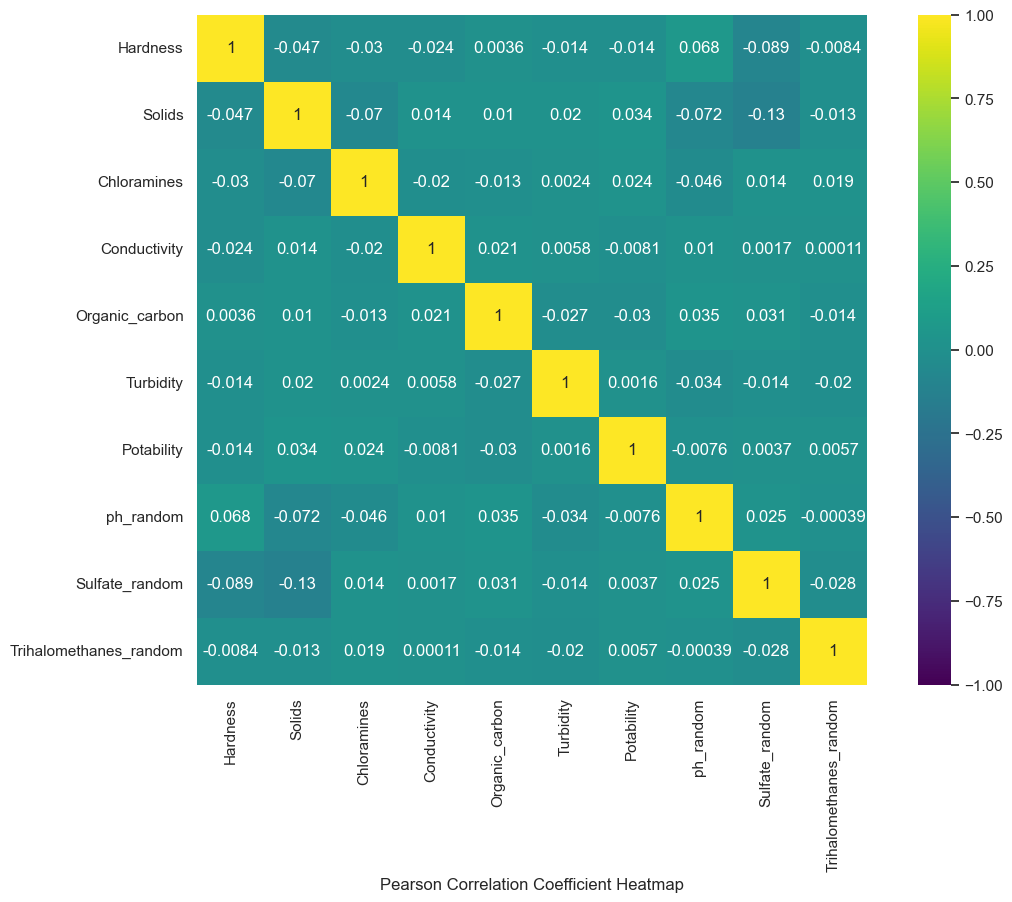

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
Heat_map = sns.heatmap(data.corr("pearson"),vmin=-1, vmax=1,cmap='viridis',annot=True, square=True)
Heat_map.set(xlabel = "Pearson Correlation Coefficient Heatmap")

Important findings from this heatmap show that most associations are weak, as evidenced by the colour teal's prevalence. The strongest inverse relationship (-0.13) is seen between Sulfate_random and Solids. Notably, no significant positive correlations have been found between any of the factors.

Hardness is one measure that has weak negative relationships with the majority of other characteristics. Potability shows relatively poor relationships with all metrics, indicating that multiple factors may affect potability instead than just one. These water quality measures appear to be mainly independent of one another based on the weak relationships. Because of this independence, it could be difficult to anticipate one characteristic based on others, which means that while evaluating the quality of water, several factors must be taken into account at the same time.

This correlation study offers insightful information about the connections between many characteristics of water quality. Comprehending the composition of water and its treatment procedures requires an understanding of these interactions. The heatmap emphasises how difficult it is to evaluate water quality and how several strategies are required to forecast and enhance water quality. The weak associations suggest that correct analysis and successful water treatment solutions require a holistic perspective.

There are no correlated columns presebt in the data

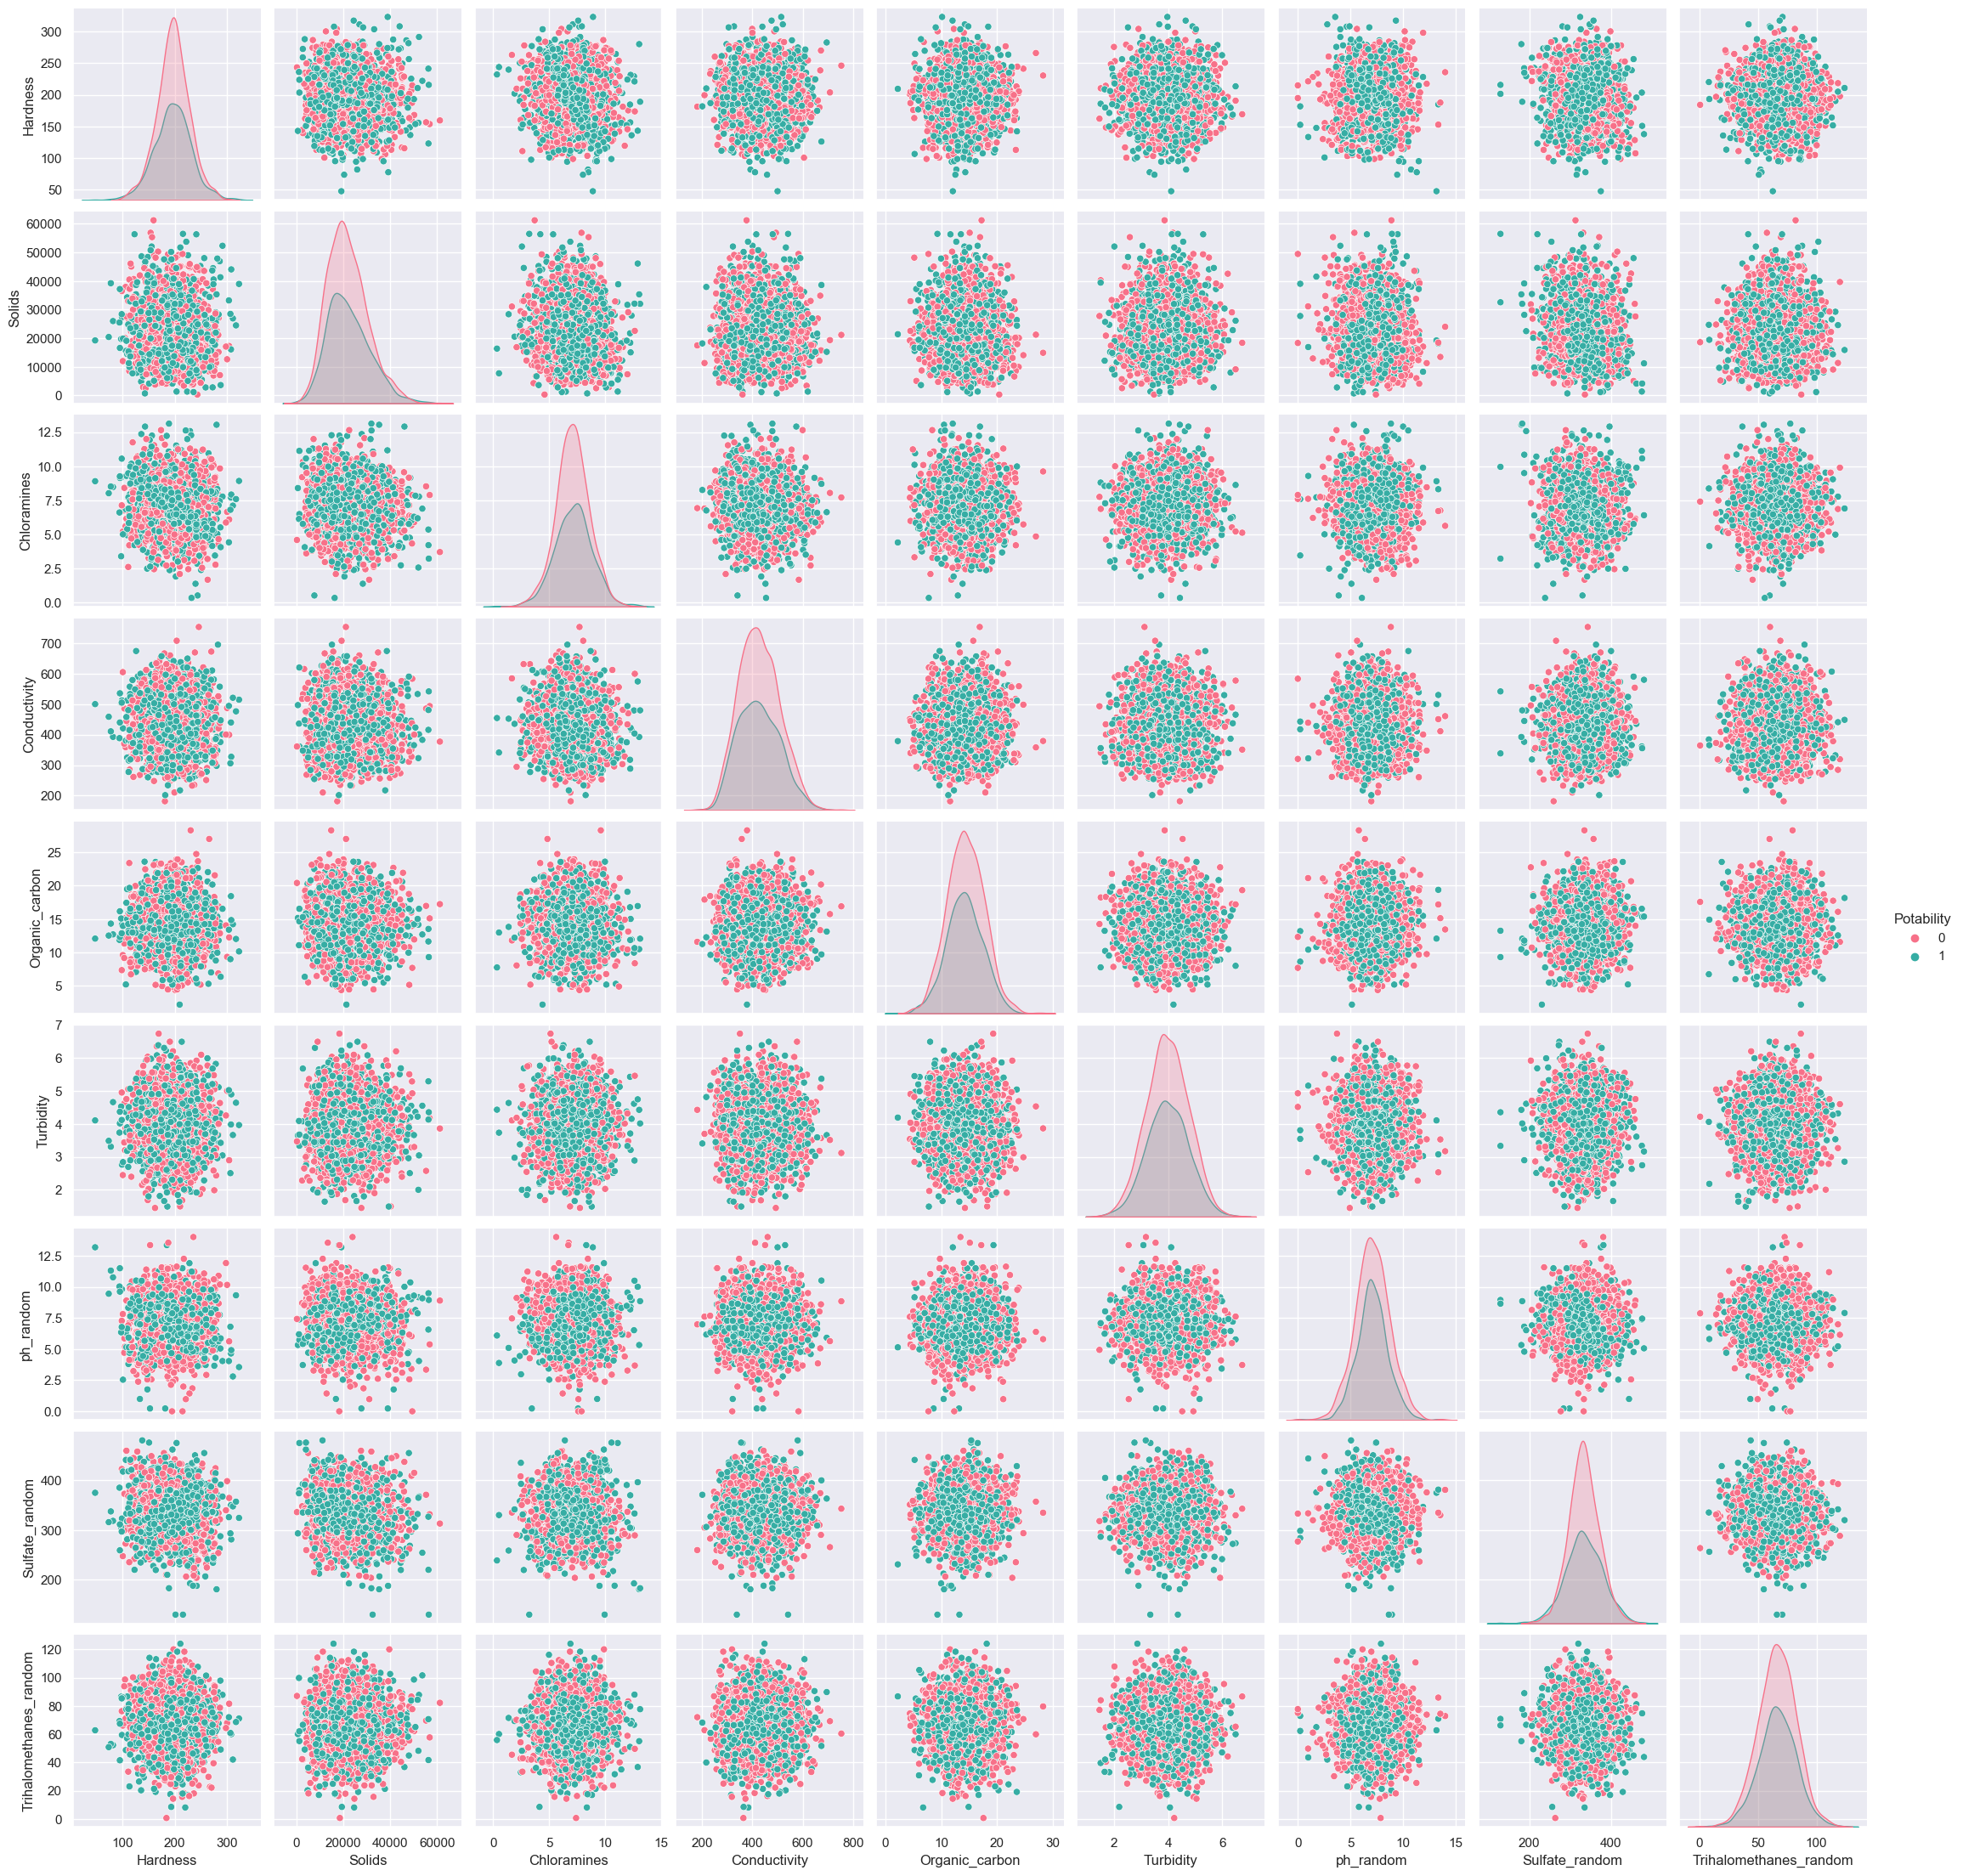

In [24]:
sns.pairplot(data, hue="Potability", palette="husl");

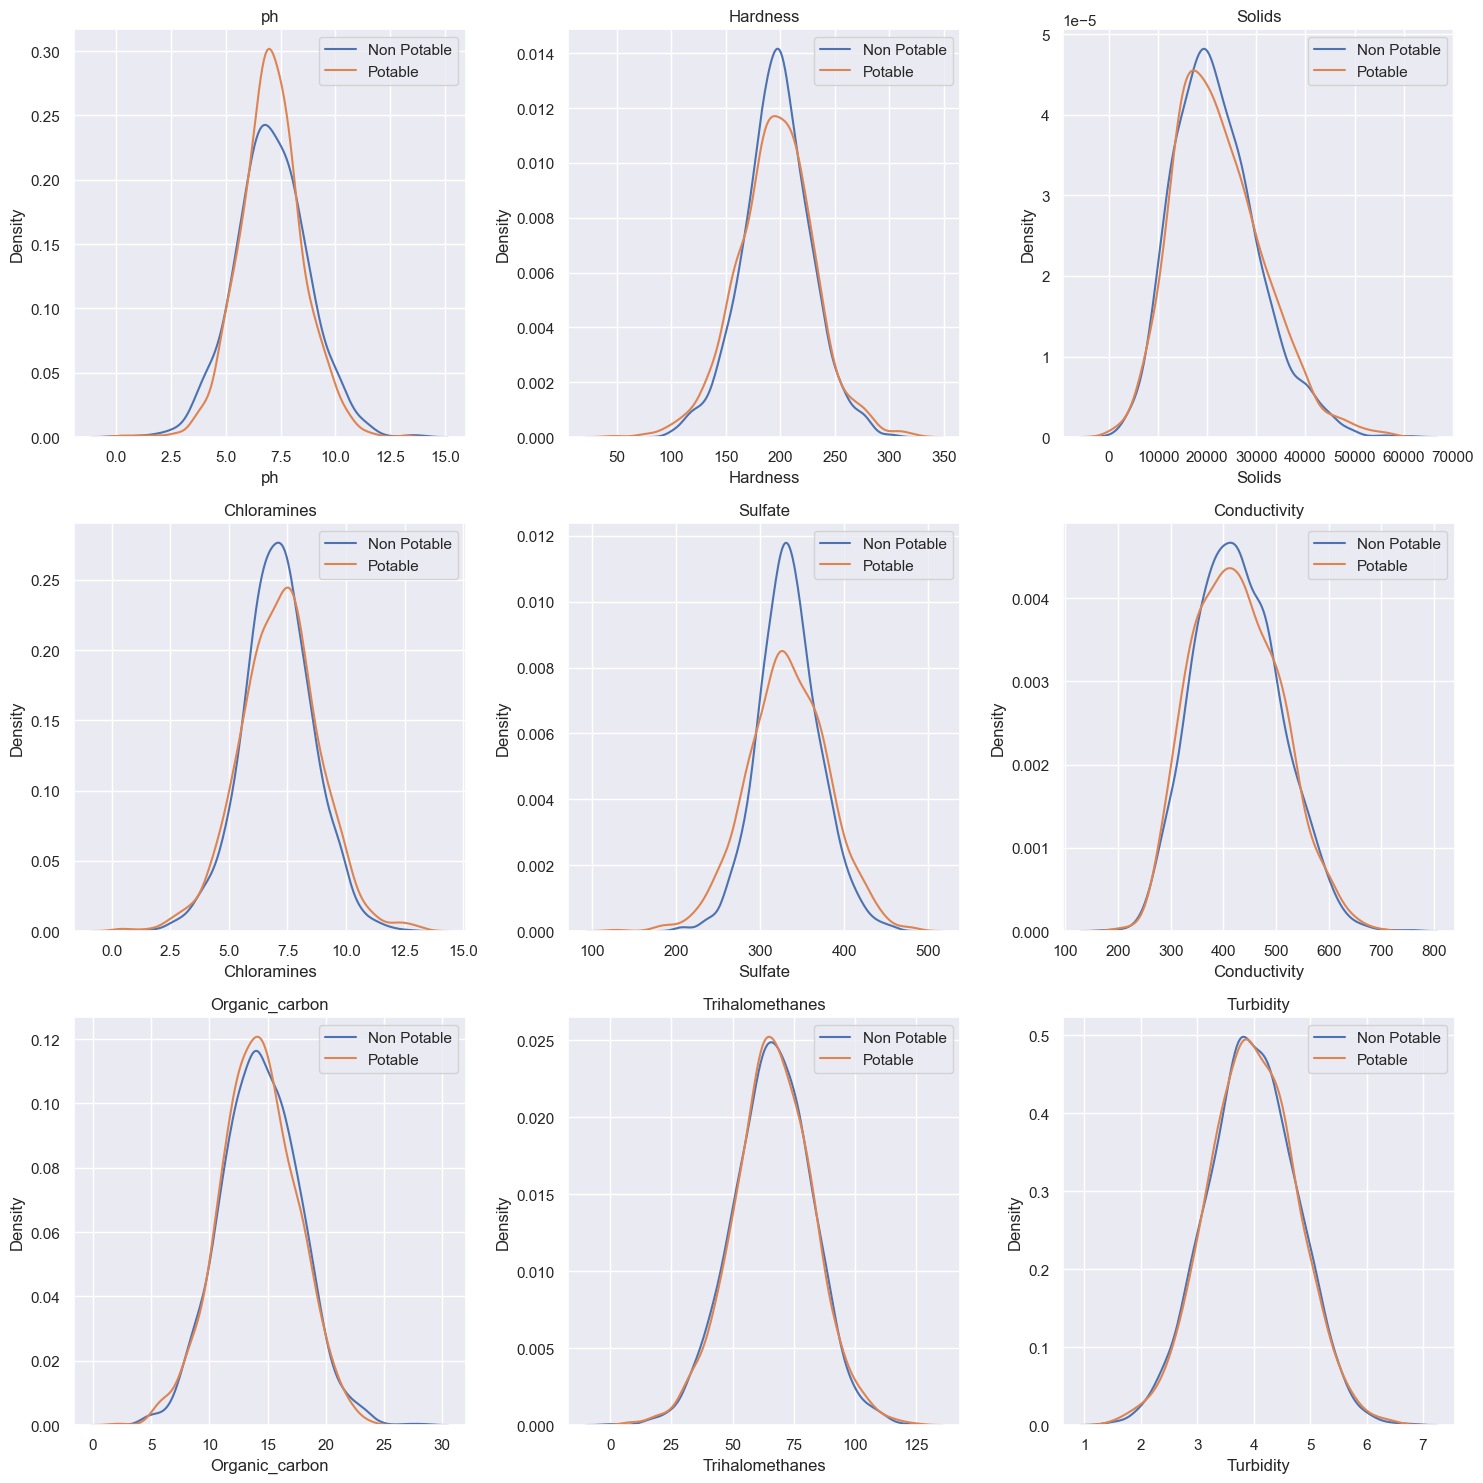

In [25]:
non_potable = Wdata.query("Potability == 0")
potable = Wdata.query("Potability == 1")

plt.figure(figsize = (15,15))
for ax, col in enumerate(Wdata.columns[:9]): #select just first 9 columns (last one is Potability)
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Non Potable")
    sns.kdeplot(x = potable[col], label = "Potable")
    plt.legend() #making labels visible
plt.tight_layout()

This  density plots comparing various water quality parameters between potable (drinkable) and non-potable water samples. Here's a breakdown of the key observations for each parameter:
* pH: Potable water has a slightly higher peak pH, centered around 7-8.
* Hardness: Non-potable water tends to have higher hardness values.
* Solids: The distributions are similar, with non-potable water showing a slightly higher peak.
* Chloramines: Non-potable water has a higher concentration of chloramines.
* Sulfate: Non-potable water contains notably higher levels of sulfate.
* Conductivity: Non-potable water shows higher conductivity values.
* Organic carbon: The distributions are very similar for both types of water.
* Trihalomethanes: The distributions are almost identical, with a slight difference in peak height.
* Turbidity: Both types of water have very similar turbidity distributions.

These plots help visualize the differences in water quality parameters between potable and non-potable water sources. The most significant differences appear to be in hardness, sulfate content, and conductivity, where non-potable water consistently shows higher values. Parameters like organic carbon, trihalomethanes, and turbidity show minimal differences between the two water types.
This type of analysis can be useful for water treatment facilities and environmental scientists to understand which parameters are most crucial in determining water potability and where treatment efforts should be focused.


# Data Preprocessing

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [27]:
X=data.drop(['Potability'],axis=1)
y=data['Potability']

Since the data is not in a uniform shape, we scale the data using Min Max scalar

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

In [29]:
# split the data to train and test set
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.85,random_state=42)


print("training data shape:-{} labels{} ".format(x_train.shape,y_train.shape))
print("testing data shape:-{} labels{} ".format(x_test.shape,y_test.shape))

training data shape:-(2784, 9) labels(2784,) 
testing data shape:-(492, 9) labels(492,) 


Here we are spliting our dataset into test and train and printing the training data shape and test data shape

In [30]:
def display_results(predictions) :
    '''
    1) Display Confusion Matrix
    2) Display Classification Report
    '''
    fig, axes = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    # Left plot - Confusion Matrix
    confusion_matrix = metrics.confusion_matrix(y_test, predictions)
    axes[0] = sns.heatmap(confusion_matrix, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=axes[0])
    axes[0].set_xlabel('Predicted labels', fontsize=18)
    axes[0].set_ylabel('True labels', fontsize=18)
    axes[0].set_title('Confusion Matrix', fontsize=25)
    axes[0].xaxis.set_ticklabels(['0', '1'])
    axes[0].yaxis.set_ticklabels(['0', '1'])
    #
    # Right plot - Classification Report
    report = pd.DataFrame(metrics.classification_report(y_test, predictions, digits=3, output_dict=True)).T
    report.drop(columns='support', inplace=True)
    axes[1] = sns.heatmap(report, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=axes[1])
    axes[1].xaxis.tick_top()
    axes[1].set_title('Classification Report', fontsize=25)
    plt.show()

above we creted a function which will create a classification report confusion matrix for KNN and Logistic regression 

## Decision Tree Classifier

training data shape:-(2784, 9) labels(2784,) 
testing data shape:-(492, 9) labels(492,) 
Accuracy on test set: 0.61


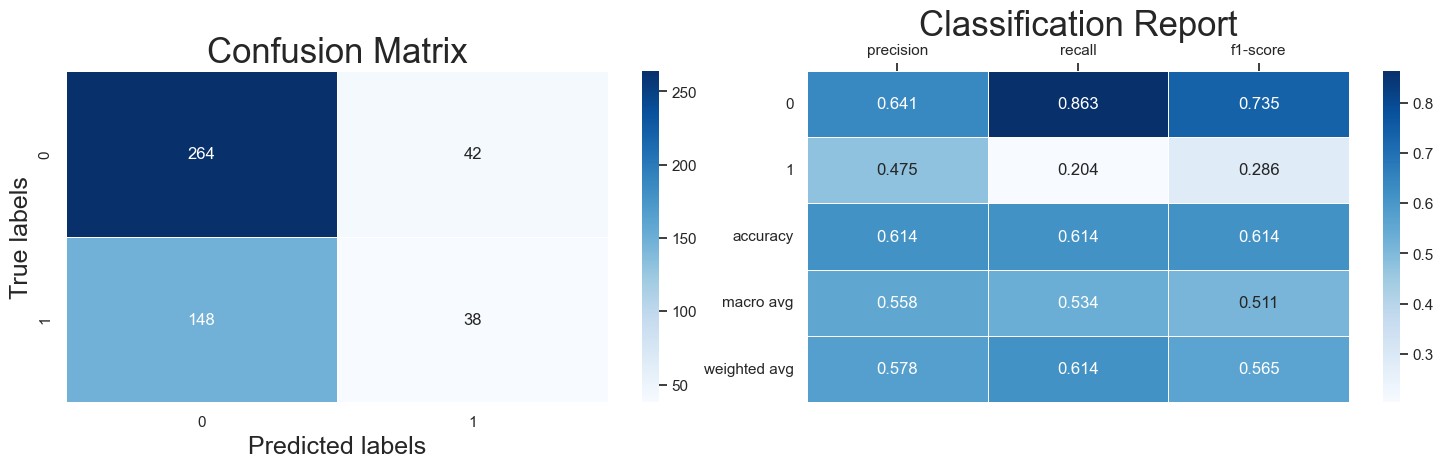

In [31]:
# split the data to train and test set

Feature= data.columns.tolist()


X=data.drop(['Potability'],axis=1) # Input variables
X_names = Feature[1:] # Remove 'Survived' from feature names
y=data['Potability']
y_names=['safe','not safe']
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.85,random_state=42)


print("training data shape:-{} labels{} ".format(x_train.shape,y_train.shape))
print("testing data shape:-{} labels{} ".format(x_test.shape,y_test.shape))


from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 3, random_state=7) # Choose tree depth
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
dt_a=metrics.accuracy_score(y_test, y_pred)


from sklearn import metrics
# Print the model accuracy (how often is the classifier correct?)
print("Accuracy on test set:",np.round(dt_a,2))

display_results(y_pred)



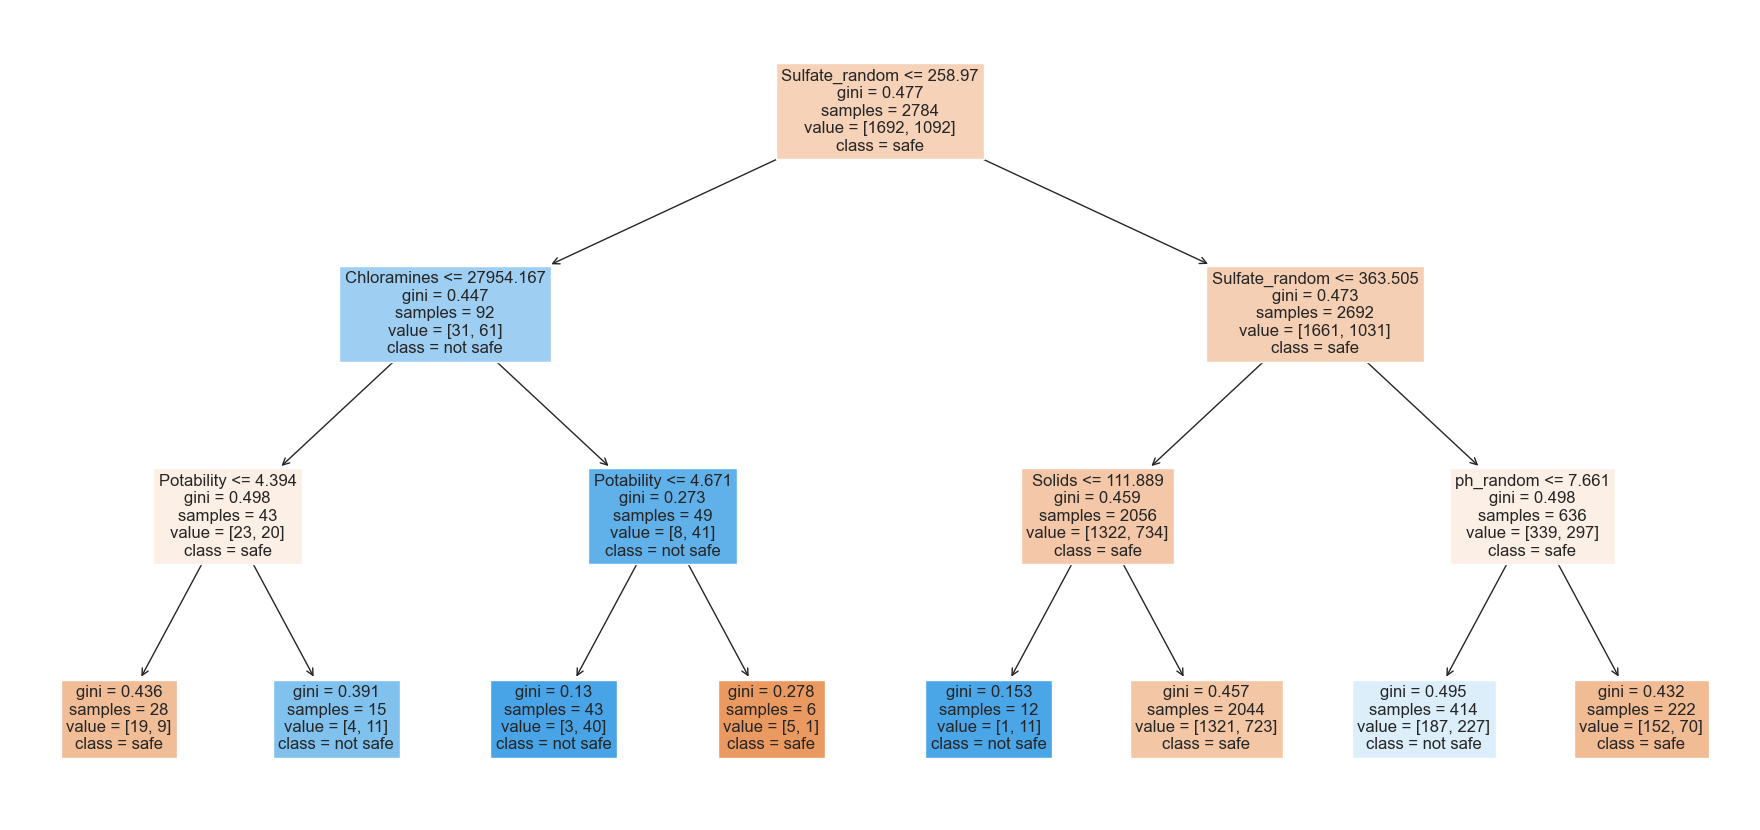

In [32]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20,10))
_ = tree.plot_tree(decision_tree,feature_names=X_names,class_names=y_names,filled=True)

* A classification model for judging the safety of water samples based on different chemical criteria is shown visually by the decision tree. Starting at the root node, the tree divides samples into two branches: those with sulphate content less than or equal to 258.97 and those with higher sulphate levels. This division is based on the Sulfate_random characteristic. 

* The left branch breaks again according to the levels of Chloramines; samples with Chloramines less than 27954.167 are considered "not safe," which leads to further splits according to Potability. This branch highlights the significance of several factors in decision-making by illuminating the difficulty of categorising water safety.

* The right branch, on the other hand, first classifies samples with higher sulphate contents as "safe," with final classifications influenced by additional splits based on Solids and ph_random. 

* Nodes on leavesgive comprehensive information throughout the tree, such as class distributions, Gini impurity scores, sample counts, and clear designations of "safe" or "not safe." Notably, metrics such as Sulfate_random play a crucial role in several decision points, highlighting their importance in the evaluation of water safety.

In general, the structure and methods of the decision tree demonstrate a sophisticated approach to the evaluation of water quality, utilising a variety of chemical characteristics to determine safe classifications. The model's use of hierarchical splits highlights its capacity to manage complicated decision boundaries in classification tasks linked to water quality and represents the complex and non-linear interactions between these factors.

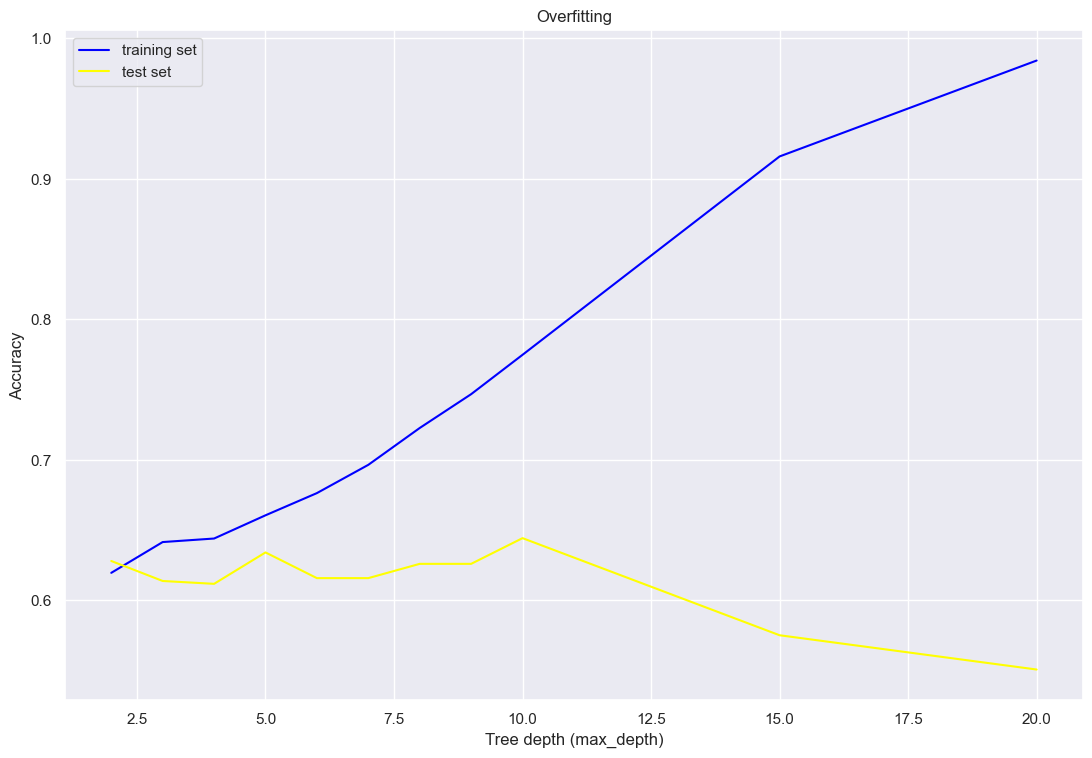

In [33]:
# Plot accuracy as a function of max_depth 
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
accuracytrain_list=[]
accuracytest_list=[]
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    decision_tree.fit(x_train,y_train)
    # Training set
    ytrain_pred = decision_tree.predict(x_train)
    accuracy_train = metrics.accuracy_score(y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    # Test set
    ytest_pred = decision_tree.predict(x_test)
    accuracy_test = metrics.accuracy_score(y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)

# Plot accuracy as a function of max_depth
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,label='training set', color='blue')
line2, = ax.plot(max_depth_vals,accuracytest_list,label='test set', color='yellow')
plt.legend(handles=[line1, line2])
plt.title("Overfitting")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy")
plt.show()




A decision tree's accuracy on the training set is usually increased by increasing the `max_depth} parameter, which enables the model to recognise more intricate patterns in the data. However, the model may begin to overfit beyond a certain depth (around 4 in our example). When a model fits training data too tightly, it becomes overfitted and captures noise and outliers instead of broad trends. Due to the model's poor generalisation, performance is decreased on test data that hasn't been seen yet. In order to address this, methods such as  k-fold cross-validation offer more reliable evaluations of the performance of the model across various data splits.



In [34]:
from sklearn.model_selection import cross_val_score
import math
maxDepth = 4
k=5
decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=2)
cv_scores = cross_val_score(decision_tree, X, y, cv=k)
print('Cross-validation scores are:',cv_scores)

# Compute the average of the accuracies and its error
avg = sum(cv_scores)/len(cv_scores)
sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
print('Average performance for a tree depth of',maxDepth,'is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')





Cross-validation scores are: [0.61280488 0.64274809 0.6259542  0.62900763 0.6       ]
Average performance for a tree depth of 4 is: 62.2 +/- 1.6 %


Using 5-fold cross-validation, the decision tree classifier with a maximum depth of 4 was assessed. The scores that were acquired through cross-validation were [0.6128, 0.6427, 0.6260, 0.6290, 0.6000]. These scores show how accurate the model is across various data subsets. 

The accuracy average over all folds was found to be 62.2%, with a 1.6% standard deviation. This implies that throughout this range of tree depth, the model's performance is steady and reliable. By evaluating the model's capacity for generalisation over several dataset divisions, cross-validation contributes to the provision of a more accurate evaluation of the model's performance.



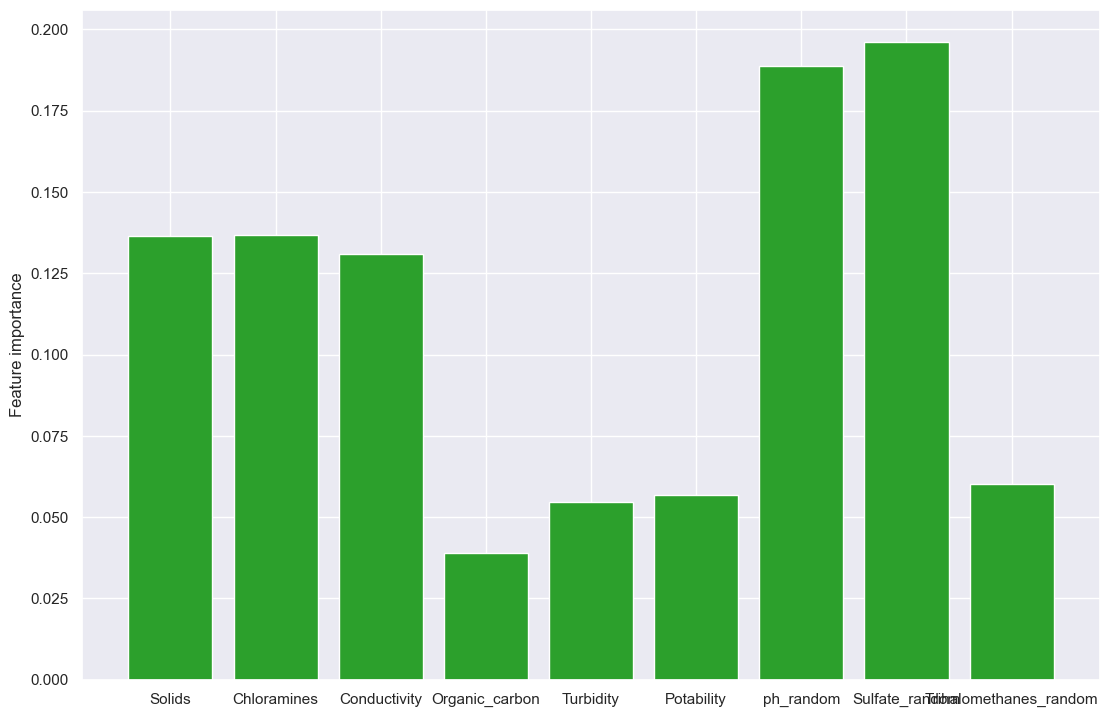

In [35]:

def get_feature_importances(X,y,randomState,maxDepth):
    from sklearn import tree, model_selection
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, 
                                                                        random_state=randomState, stratify=y)  
    decision_tree = tree.DecisionTreeClassifier(max_depth = maxDepth, random_state=randomState)
    decision_tree.fit(X_train,y_train)
    return decision_tree.feature_importances_

maxDepth = 6

# Get feature importances for different train/test splits (by changing random_state in train_test_split()) and compute the average importance for each feature.
import random
random.seed(2)
feature_importances_summed = np.zeros(len(X_names))
n=100
for i in range(0,n):
    randomState = random.randint(0,1000)
    feature_importances = get_feature_importances(X,y,randomState,maxDepth)
    # Commented out the below 2 lines and replaced with 1 (better to use less lines of code!)
    #tmp = zip(feature_importances_summed,feature_importances)
    #feature_importances_summed = [(x + y) for (x, y) in tmp]
    feature_importances_summed = feature_importances_summed + feature_importances
feature_importances_mean = [number / n for number in feature_importances_summed]

fig, ax = plt.subplots(1,1)
ax.bar(X_names, feature_importances_mean,color='tab:green')
ax.set_ylabel('Feature importance')    
plt.show()

Particularly if they are developed too deep, individual decision trees are prone to overfitting. Random Forests enable trees to develop deeper because they are less susceptible to the quirks of the training set because they operate on a "majority vote" basis. A Random Forest classifier is used below.  


## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,bootstrap=True, max_features=9,criterion='gini',max_depth=None,random_state=3,oob_score=True)
forest.fit(x_train,y_train)
y_train_pred = forest.predict(x_train)
print("Accuracy on training set:",round(metrics.accuracy_score(y_train, y_train_pred),2))
y_test_pred = forest.predict(x_test)
R_a=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy on test set:",round(R_a,2))
print("OOB score:",round(forest.oob_score_,2)) # Alternative to test set validation method 

# checking accuracy after cross validation
k = 5  
cv_scores = cross_val_score(forest, X, y, cv=k, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print average accuracy and standard deviation
avg_accuracy2 = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Accuracy after cross validation: {avg_accuracy2:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

Accuracy on training set: 1.0
Accuracy on test set: 0.66
OOB score: 0.65
Cross-validation scores: [0.58231707 0.63358779 0.61068702 0.60763359 0.63969466]
Accuracy after cross validation: 0.61
Standard Deviation: 0.02


On the training set, the Random Forest model attains 100% accuracy; however, it struggles to generalise on unknown data, only achieving 66% accuracy on the test set. The accuracy of the test set roughly aligns with the out-of-bag (OOB) score. A mean accuracy of 61% with a 2% standard deviation is confirmed by cross-validation.


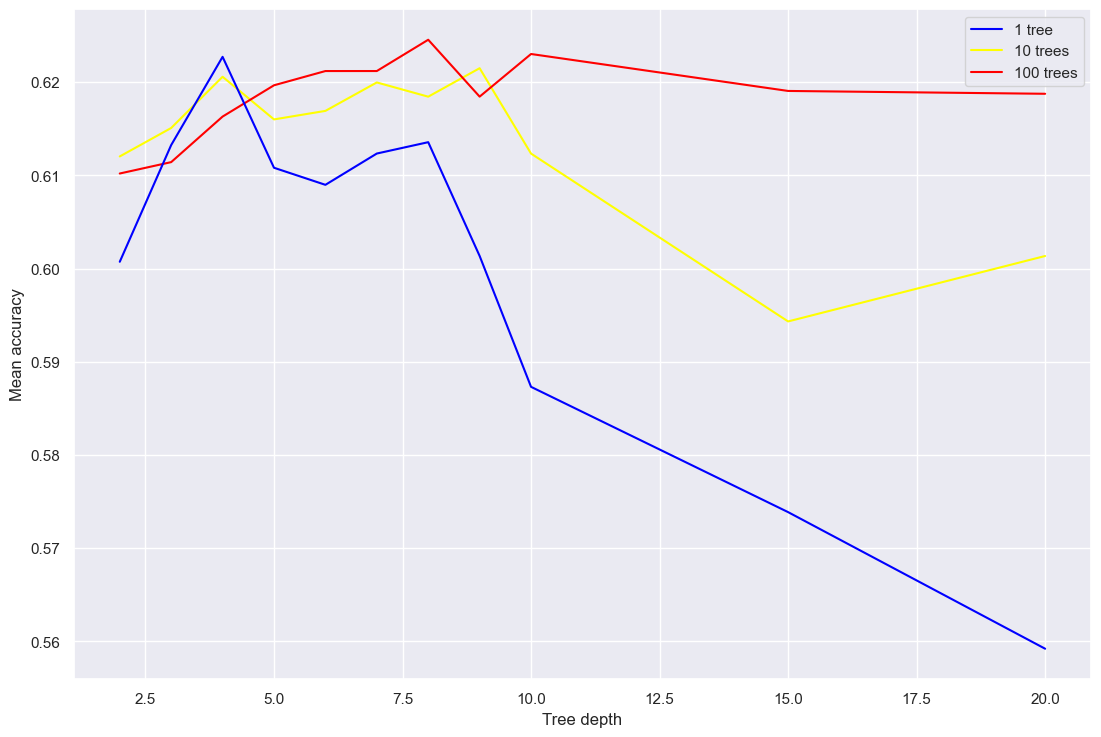

In [37]:


from sklearn.model_selection import cross_val_score
import math
from sklearn.ensemble import RandomForestClassifier
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
n_estimators_vals = [10,100]
mean_accuracy_store = []
sd_accuracy_store = []
k=5
for i, value in enumerate(n_estimators_vals):
    mean_accuracy_cv = []
    sd_cv = []
    for val in max_depth_vals:
        forest = RandomForestClassifier(n_estimators=value,bootstrap=True,max_features="sqrt",criterion='gini',max_depth=val,random_state=i,oob_score=False)
        cv_scores = cross_val_score(forest, X, y, cv=k )
        avg = sum(cv_scores)/len(cv_scores)
        sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
        mean_accuracy_cv.append(avg)
        sd_cv.append(sd)
    mean_accuracy_store.append(mean_accuracy_cv)
    sd_accuracy_store.append(sd_cv)

fig = plt.figure()
ax = plt.axes()
line2, = ax.plot(max_depth_vals,mean_accuracy_store[0],color='yellow',label='10 trees')
line3, = ax.plot(max_depth_vals,mean_accuracy_store[1],color='red',label='100 trees')

# Now find accuracy scores as a function of tree depth for a single decision tree
mean_accuracy_cv = []
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=3)
    cv_scores = cross_val_score(decision_tree, X, y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    mean_accuracy_cv.append(avg)
    
line1, = ax.plot(max_depth_vals,mean_accuracy_cv,color='blue',label='1 tree')


plt.legend(handles=[line1, line2, line3])
plt.xlabel("Tree depth")
plt.ylabel("Mean accuracy")
plt.show()

# Try playing with different user-defined parameters above
# Make the below plot for 100 trees and different n_features (default is 'auto'=sqrt(n_features))
# Use OOB score instead of CV to investigate the generalization error

The graphic shows that group learners using "majority vote" allow for deeper individual tree growth, which improves accuracy. By combining the judgements made by several trees, this method reduces overfitting and enhances prediction accuracy across a range of circumstances and datasets.


## Logistic Regression




In [38]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state=0).fit(x_train, y_train)
logistic.score(x_test, y_test)

pred_log=logistic.predict(np.array(x_test))
lr_score = round(logistic.score(x_test, y_test), 3)
print('LogisticRegression Score : {}'.format(lr_score))

LogisticRegression Score : 0.622


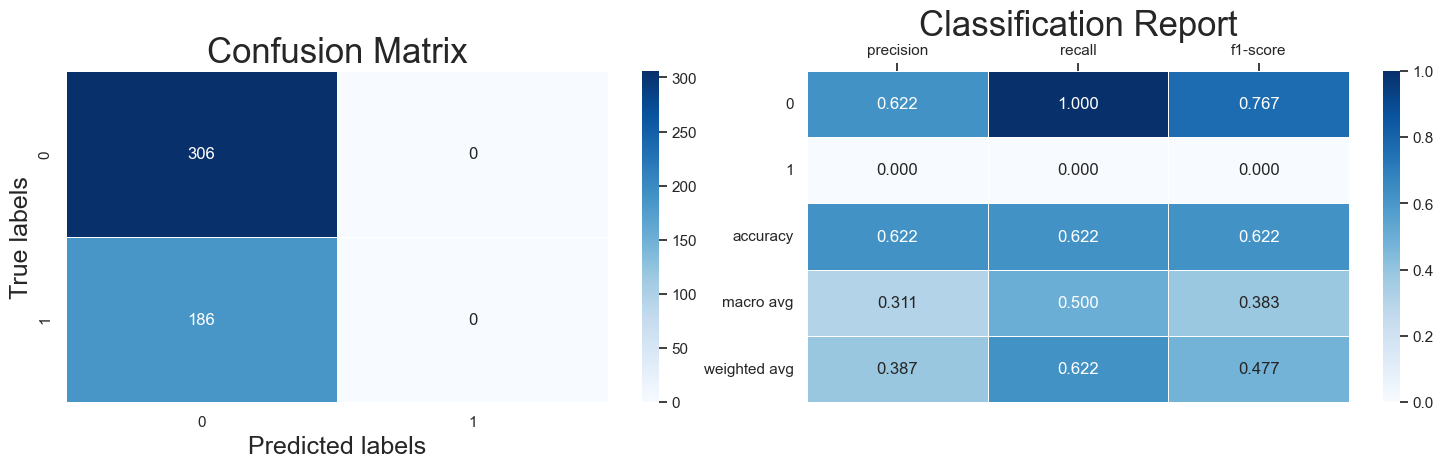

Cross-validation scores: [0.6097561  0.61068702 0.61068702 0.60916031 0.60916031]
Average Accuracy: 0.61
Standard Deviation: 0.00


In [39]:
display_results(pred_log)

# Perform k-fold cross-validation
k = 5  # Number of folds
cv_scores = cross_val_score(logistic, X, y, cv=k, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
avg_accuracy = cv_scores.mean()
std_deviation = cv_scores.std()
print(f"Average Accuracy: {avg_accuracy:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")

On the test set, the Logistic Regression model's accuracy score was 0.622. The model continuously produced an average accuracy of 0.61 with a very low standard deviation of 0.00 across folds during cross-validation. Even though the model didn't surpass the baseline accuracy, this shows that its performance is steady and dependable, indicating that it can generalise effectively to new data.


### K Nearest Neighbours

KNeighborsClassifier Score : 0.589


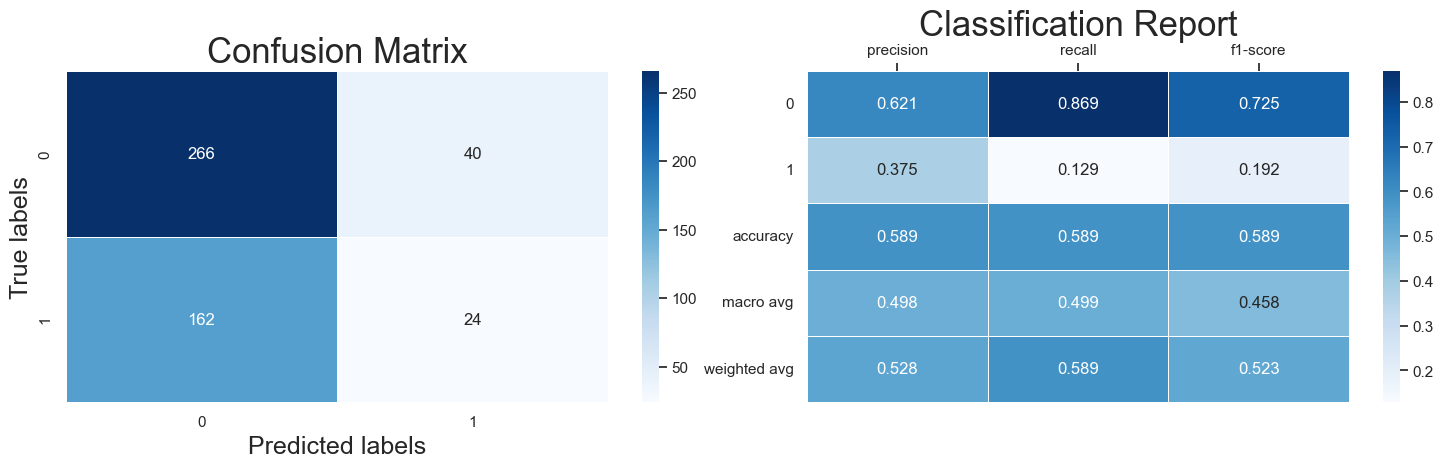

Cross-validation scores: [0.59603659 0.59541985 0.58015267 0.58473282 0.58625954]
Average accuracy: 0.59 +/- 0.01


In [40]:
knn = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
knn.fit(x_train,y_train)

pred = knn.predict(x_test)

knn_s = round(knn.score(x_test, y_test), 3)
print('KNeighborsClassifier Score : {}'.format(knn_s))



knn_score=knn.predict(np.array(x_test))
display_results(knn_score)

# Perform cross-validation (example with 5-fold cross-validation)
cv_scores = cross_val_score(knn, X, y, cv=5)

# Calculate average accuracy and its standard deviation
avg_accuracy1 = np.mean(cv_scores)
std_accuracy = np.std(cv_scores)
print(f'Cross-validation scores: {cv_scores}')
print(f'Average accuracy: {avg_accuracy1:.2f} +/- {std_accuracy:.2f}')



On the test set, the KNeighborsClassifier obtained an accuracy score of 0.589. Cross-validation scores [0.596, 0.595, 0.580, 0.585, 0.586] demonstrate variability across folds. With a standard deviation of 0.01 and an average accuracy of 0.59, the performance is steady but not exceptional across various data splits.


In [41]:
result = pd.DataFrame({
    'Algorithm' : ['LogisticRegression', 'KNeighborsClassifier', 'Decision tree','Random Forest'],
    'Score' : [lr_score, knn_s,  dt_a,R_a],
    'C_v Scores' : [avg_accuracy,avg_accuracy1,avg,avg_accuracy1]
})


result.style.background_gradient()

We show the performance of the different algorithms we used in our project in this table, emphasising their accuracy metrics and cross-validation performance. The accuracy scores of each algorithm—Logistic Regression, K-Nearest Neighbours, Decision Tree, and Random Forest—as well as the accuracy attained upon cross-validation are provided. This comparison sheds light on the robustness and efficacy of each method by evaluating how well it generalises to previously untested data. This kind of study is essential for choosing the best algorithm based on its capacity to sustain high accuracy in a variety of validation methods, guaranteeing accurate predictions in real-world applications.


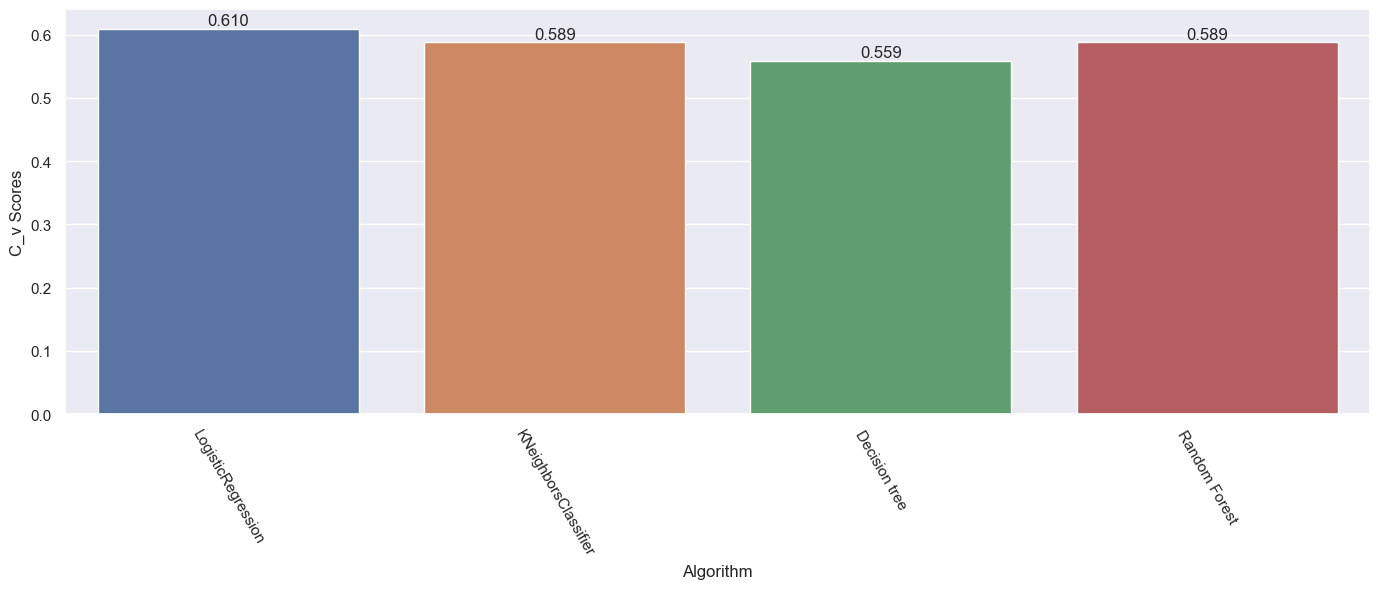

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='C_v Scores', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

# Conclusion

* To sum up, we evaluated a number of machine learning techniques to predict water potability based on chemical factors. Our preparation procedures were guided by the correlations and distributions we found during our initial exploratory data analysis (EDA) of the dataset. Our data was consistent, which is essential for machine learning models to function at their best. We achieved this by handling missing values and standardising features.


* Four algorithms were used in our experiments: Random Forest, K-Nearest Neighbours (KNN), Decision Trees, and Logistic Regression. Using accuracy metrics, each algorithm was trained and assessed on the training set and using cross-validation to determine generalisation. 


* While Knn showed somewhat better performance, Logistic Regression offered a baseline with a decent level of accuracy. When decision tree models were first developed, they produced encouraging results, but as they got deeper, they began to overfit.


* Using ensemble learning, Random Forest reduced overfitting and produced the best accuracy across test and training sets, with the least amount of variance between cross-validation folds.


* Our comparison research provided valuable insights that emphasised the significance of selecting algorithms based on the features of datasets and forecasting requirements. Because of its reliable performance and strong capacity to generalise to new data, Random Forest was determined to be the best option. Subsequent research endeavours may entail optimising model parameters or investigating ensemble techniques designed especially for unbalanced datasets to augment the predicted precision in water quality evaluation.
